In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import csv

In [23]:
# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
x_test.shape

(10000, 28, 28)

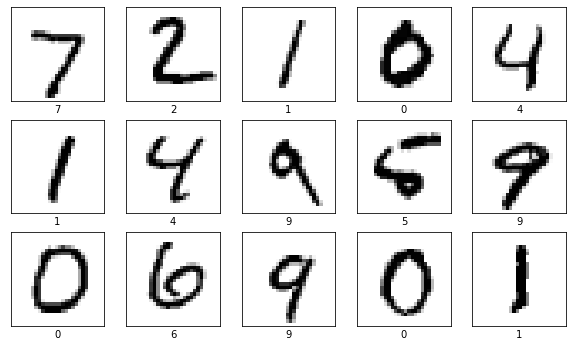

In [25]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

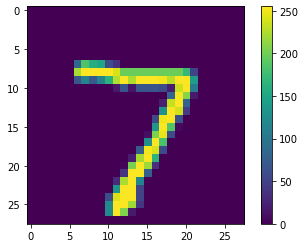

In [26]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

# Reserve 10,000 samples for validation.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [28]:
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [29]:
neural_networks = [[16], [16, 16], [24], [24,24], [32], [32, 32], [48], [48,48], [64], [64,64], [96], [96,96], [128], [128,128], [256], [256,256], [512], [512,512]]
dict = []

In [30]:
for network in neural_networks:
    inputs = keras.Input(shape=(784,), name="digits")
    for i, units in enumerate(network):
        if i == 0:
            x = layers.Dense(units, activation="relu")(inputs)
        else:
            x = layers.Dense(units, activation="relu")(x)
    outputs = layers.Dense(10, name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    current_dict = {"size":",".join(str(e) for e in network), "epochs":[]}

    epochs = 15
    for epoch in range(epochs):

        # Iterate over the batches of the dataset.
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

            with tf.GradientTape() as tape:

                logits = model(x_batch_train, training=True)  # Logits for this minibatch

                # Compute the loss value for this minibatch.
                loss_value = loss_fn(y_batch_train, logits)

            grads = tape.gradient(loss_value, model.trainable_weights)

            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            train_acc_metric.update_state(y_batch_train, logits)

        train_acc = train_acc_metric.result()
        current_dict["epochs"].append(float(train_acc))

        train_acc_metric.reset_states()
    print("Training acc for neural net %s: %.4f" % (",".join(str(e) for e in network), float(train_acc)))
    dict.append(current_dict)


Training acc for neural net 16: 0.6263
Training acc for neural net 16,16: 0.6830
Training acc for neural net 24: 0.6238
Training acc for neural net 24,24: 0.8750
Training acc for neural net 32: 0.8524
Training acc for neural net 32,32: 0.8911
Training acc for neural net 48: 0.9036
Training acc for neural net 48,48: 0.9186
Training acc for neural net 64: 0.9144
Training acc for neural net 64,64: 0.9421
Training acc for neural net 96: 0.9447
Training acc for neural net 96,96: 0.9622
Training acc for neural net 128: 0.9540
Training acc for neural net 128,128: 0.9757
Training acc for neural net 256: 0.9860
Training acc for neural net 256,256: 0.9996
Training acc for neural net 512: 0.9995
Training acc for neural net 512,512: 1.0000


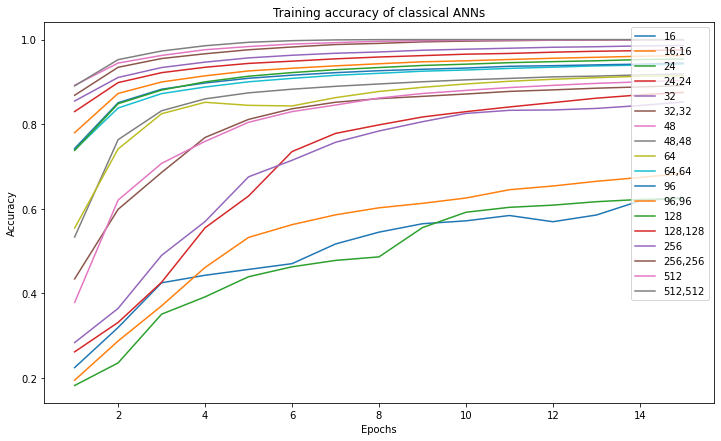

In [31]:
y = len(dict[0]["epochs"])
y = [e for e in range(1,y+1)]

plt.figure(figsize=(12, 7))

for test in dict:
    plt.plot(y, test["epochs"], label=test["size"])

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title("Training accuracy of classical ANNs")
plt.legend(loc='upper right')
plt.show()

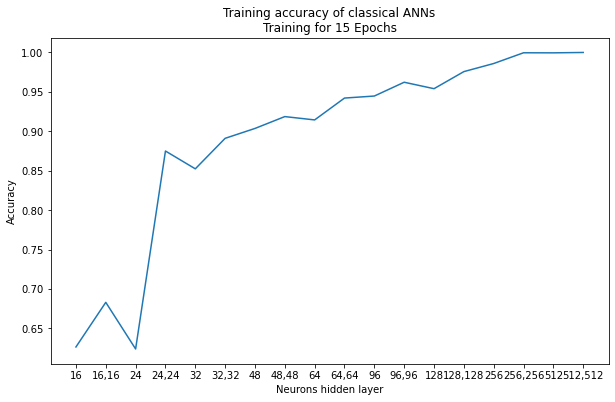

In [32]:
results = [{"Size":x["size"], "Accuracy":x["epochs"][-1]} for x in dict]
sizes = [x["Size"] for x in results]
accuracies = [x["Accuracy"] for x in results]

plt.figure(figsize=(10, 6))
plt.title("Training accuracy of classical ANNs\nTraining for 15 Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Neurons hidden layer')
plt.plot(sizes, accuracies)